# k-NEAREST NEIGHBORS

**File:** kNN.ipynb

**Course:** Industrial Data Mining Foundations

# IMPORT LIBRARIES

In [1]:
import matplotlib.pyplot as plt                      # For plotting data
import seaborn as sns                                # For plotting data
import pandas as pd                                  # For dataframes
from sklearn.model_selection import GridSearchCV     # For parameter optimization
from sklearn.neighbors import KNeighborsClassifier   # For kNN classification
from sklearn.metrics import ConfusionMatrixDisplay   # Evaluation measure

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# LOAD AND PREPARE DATA
Load the training data `trn` and testing data `tst` from the CSV files in the data directory. Separate the data matrix from the class variable.

In [9]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('G:/Pengmasy SDT/PB_U1.csv')
# Specifies X by filtering all columns with a number in name
X_trn, X_tst, y_trn, y_tst = train_test_split(data, data.Keterangan, test_size = 0.30, random_state=100)

Look at the first few rows of the training data.

In [10]:
y_trn = pd.DataFrame(y_trn)
y_tst = pd.DataFrame(y_tst)
y_tst

,Keterangan
376,0
29,1
98,2
197,1
233,1
...,...
298,2
455,3
297,1
64,0


In [11]:
data

,Gender,Umur,Tinggi Badan(cm),Keterangan
0,0,0,43.5,0
1,0,0,45.4,1
2,0,0,52.9,2
3,0,0,53.0,3
4,0,1,47.7,0
...,...,...,...,...
475,1,58,118.1,3
476,1,59,95.5,0
477,1,59,100.2,1
478,1,59,118.6,2


<AxesSubplot: xlabel='Tinggi Badan(cm)', ylabel='Count'>

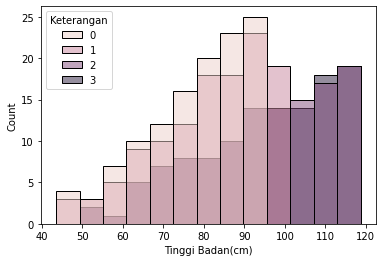

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for each species
sns.histplot(data=data, x='Tinggi Badan(cm)', hue='Keterangan')


Text(0.5, 1.0, 'Distribusi Pada Data Status Gizi Terhadap Tinggi Badan')

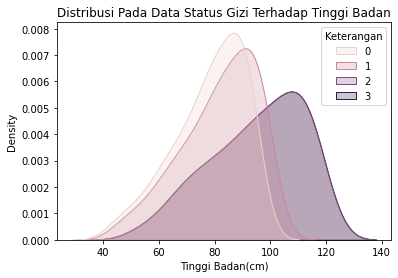

In [16]:
sns.kdeplot(data=data, x='Tinggi Badan(cm)', hue='Keterangan', shade=True)
plt.title("Distribusi Pada Data Status Gizi Terhadap Tinggi Badan")

<AxesSubplot: xlabel='3(cm)', ylabel='Count'>

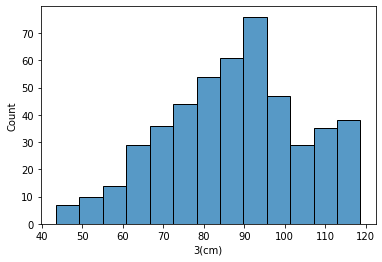

In [8]:
# Histogram 
sns.histplot(data['3(cm)'])

<AxesSubplot: xlabel='Gender', ylabel='Count'>

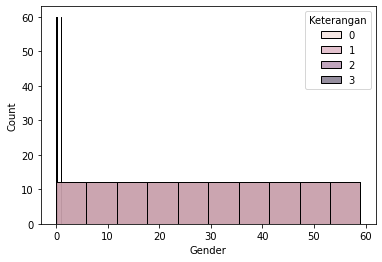

In [7]:
sns.histplot(data=data, x='Gender', hue='Keterangan')
sns.histplot(data=data, x='Umur', hue='Keterangan')

# kNN: TRAIN MODEL
To train a kNN model, set up a `KNeighborsClassifier` object and fit it to training data.

In [4]:
# Sets up a kNN model and fits it to data
knn = KNeighborsClassifier(n_neighbors=4) \
    .fit(X_trn, y_trn)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Calculate Mean Accuracy on Training Data

In [5]:
print(
    'Accuracy on training data: ' 
    + str("{:.2%}".format(knn.score(X_trn, y_trn))))

Accuracy on training data: 92.86%


## Optimize the kNN Model
The challenge in training a kNN model is to determine the optimal number of neighbors. To find the optimal parameters, `GridSearchCV` object can be used.

In [6]:
# Sets up the kNN classifier object
knn = KNeighborsClassifier() 

# Search parameters
param = range(3, 15, 2)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(
    knn,
    {'n_neighbors': param})

# Fits the grid object and gets the best model
best_knn = grid \
    .fit(X_trn,y_trn) \
    .best_estimator_

# Displays the optimum model
best_knn.get_params()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:215: 

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

## Plot the Accuracy by Neighbors Parameter
Once the optimal parameters are found, the accuracy for different parameters can be compared by plotting. The `grid` variable has an attribute `cv_results_`, which is a dictionary of key value pairs and stores the cross validation accuracy for each parameter.

# TEST MODEL
In this phase, we'll evaluate the accuracy of the trained kNN model on the test set. A good evaluation measure is the `confusion matrix` that gives the fraction of true positives, true negatives, false positives, and false negatives.

## Visualize the Confusion Matrix

Normalize the scores to display as proportions across rows.

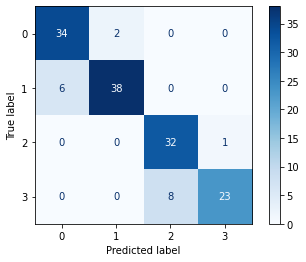

In [7]:
pred = best_knn.predict(X_tst)

ConfusionMatrixDisplay.from_predictions(
    y_tst,
    pred,
    cmap='Blues'
)

## Calculate Mean Accuracy on Testing Data

In [8]:
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_knn.score(X_tst, y_tst))))

Accuracy on testing data: 88.19%


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_tst, pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.95      0.86      0.90        44
           2       0.80      0.97      0.88        33
           3       0.96      0.74      0.84        31

    accuracy                           0.88       144
   macro avg       0.89      0.88      0.88       144
weighted avg       0.89      0.88      0.88       144



# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.